<div style="font-size:30px" align="center"> <b> Visualizing Word2Vec Models Trained on Biomedical Abstracts in PubMed </b> </div>
<div style="font-size:22px" align="center"> <b> A Comparison of Race and Diversity Over Time </b> </div>
<br>

<div style="font-size:18px" align="center"> <b> Brandon L. Kramer - University of Virginia's Bicomplexity Institute </b> </div>

<br>

This notebook explores two Word2Vec models trained the PubMed database taken from January 2021. Overall, I am interested in testing whether diversity and racial terms are becoming more closely related over time. To do this, I [trained](https://github.com/brandonleekramer/diversity/blob/master/src/04_word_embeddings/03_train_word2vec.ipynb) two models (one from 1990-2000 data and then a random sample of the 2010-2020 data). Now, I will visualize the results of these models to see which words are similar to race/diversity as well as plotting some comparisons of these two terms over time.

For those unfamiliar with Word2Vec, it might be worth reading [this post from Connor Gilroy](https://ccgilroy.github.io/community-discourse/introduction.html) - a sociologist that details how word embeddings can help us better understand the concept of "community." The post contains information on how Word2Vec and other word embedding approaches can teach us about word/document similarity, opposite words, and historical changes in words. Basically, Word2Vec turns all of the words in the corpus into a number based on how they are used in the context of 5-word windows (a parameter I defined in this model), making all of the words directly compariable to one another within a vector space. The end result is that we are able to compare how similar or different words are or, as we will see below, how similar or different words become over time. As we will come to see, this approach is useful but not perfect for dealing with our case due to the polysemy of 'diversity.'

#### Import packages and ingest data 

Let's load all of our packages and the `.bin` files that hold our models. 

In [37]:
# load packages
import os
from itertools import product
import pandas.io.sql as psql
import pandas as pd
from pandas import DataFrame
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import seaborn as sns

# load data 
os.chdir("/sfs/qumulo/qhome/kb7hp/git/diversity/data/word_embeddings/")
earlier_model = Word2Vec.load("word2vec_1990_2000.bin")
later_model = Word2Vec.load("word2vec_2010_2020.bin")

#### Analyzing Most Similar Words 

**What words are most similar to "racial," "ethnicity", and "diversity"?** As we can see below, "racial" and "ethnicity" is mostly similar to other racialized and/or gendered terms in both the 1990-2000 and 2010-20 periods. "Diversity", on the other hand, is most similar to heterogeneity, divergence and complexity in 1990-2000 and then richness, divergence and diversification in 2010-2020. Overall, this tells us a different version of the same story we saw when analyzing Hypothesis 1: "diversity" rarely refers to social diversity along racial or classed lines. Diversity is mostly used as a biological term. Even here, richness, along with evenness, are measure within Simpson's Index for measuring ecological biodiversity (e.g. [Stirling et al. 2001](https://www.journals.uchicago.edu/doi/abs/10.1086/321317?casa_token=Fb4sojZm9XgAAAAA:BV-t4e5f3SZ05gTJZRUydcQvHTYg47f1qRu51CixgF-b_HnGVXuPQFaqf_Lp88Tvy51Gnp7iw4yG)). 

Text(0.5, 1.0, 'Similar to racial in 1990-95:')

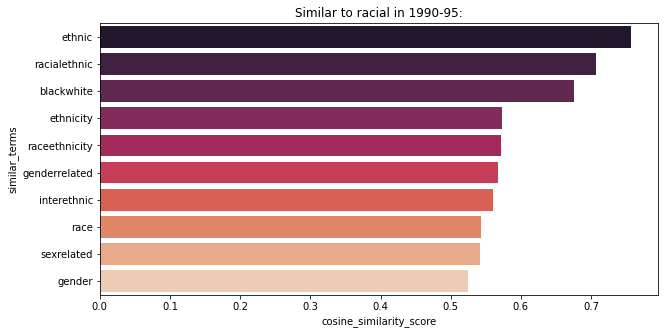

In [38]:
racial_sim_early = earlier_model.wv.most_similar('racial')
racial_sim_early = pd.DataFrame(data=racial_sim_early).rename(columns={0: "similar_terms", 
                                                                       1: "cosine_similarity_score"})
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="cosine_similarity_score", y="similar_terms", 
            data=racial_sim_early, palette="rocket", 
            ax=ax).set_title('Similar to racial in 1990-95:')

Text(0.5, 1.0, 'Similar to racial in 2015-20:')

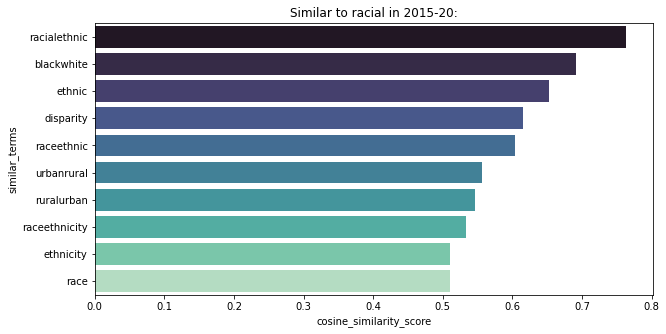

In [39]:
racial_sim_later = later_model.wv.most_similar('racial')
racial_sim_later = pd.DataFrame(data=racial_sim_later).rename(columns={0: "similar_terms", 
                                                                       1: "cosine_similarity_score"})
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="cosine_similarity_score", y="similar_terms", 
            data=racial_sim_later, palette="mako", 
            ax=ax).set_title('Similar to racial in 2015-20:')

Text(0.5, 1.0, 'Similar to ethnicity in 1990-95:')

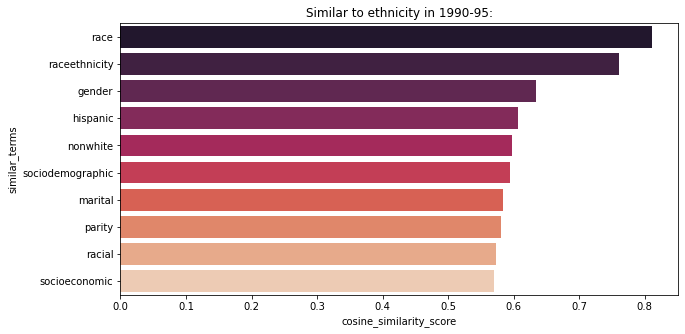

In [40]:
ethnicity_sim_earlier = earlier_model.wv.most_similar('ethnicity')
ethnicity_sim_earlier = pd.DataFrame(data=ethnicity_sim_earlier).rename(columns={0: "similar_terms", 
                                                                                 1: "cosine_similarity_score"})
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="cosine_similarity_score", y="similar_terms", 
            data=ethnicity_sim_earlier, palette="rocket", 
            ax=ax).set_title('Similar to ethnicity in 1990-95:')

Text(0.5, 1.0, 'Similar to ethnicity in 2015-20:')

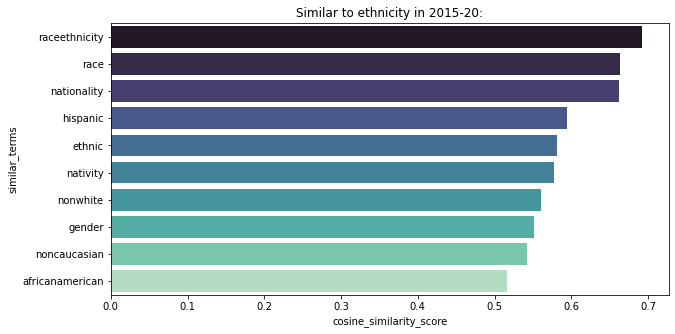

In [41]:
ethnicity_sim_later = later_model.wv.most_similar('ethnicity')
ethnicity_sim_later = pd.DataFrame(data=ethnicity_sim_later).rename(columns={0: "similar_terms", 
                                                                             1: "cosine_similarity_score"})
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="cosine_similarity_score", y="similar_terms", 
            data=ethnicity_sim_later, palette="mako", 
            ax=ax).set_title('Similar to ethnicity in 2015-20:')

Text(0.5, 1.0, 'Similar to diversity in 1990-95:')

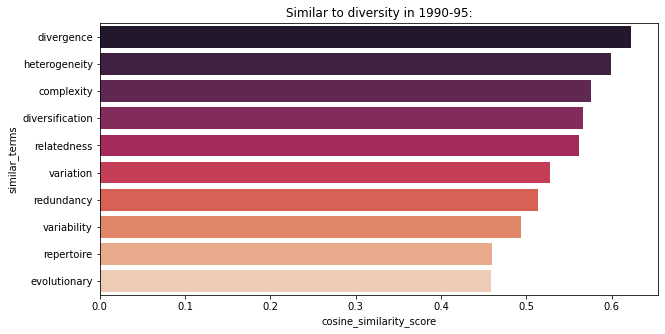

In [42]:
diversity_sim_earlier = earlier_model.wv.most_similar('diversity')
diversity_sim_earlier = pd.DataFrame(data=diversity_sim_earlier).rename(columns={0: "similar_terms", 
                                                                                 1: "cosine_similarity_score"})
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="cosine_similarity_score", y="similar_terms", 
            data=diversity_sim_earlier, palette="rocket", 
            ax=ax).set_title('Similar to diversity in 1990-95:')

Text(0.5, 1.0, 'Similar to diversity in 2015-20:')

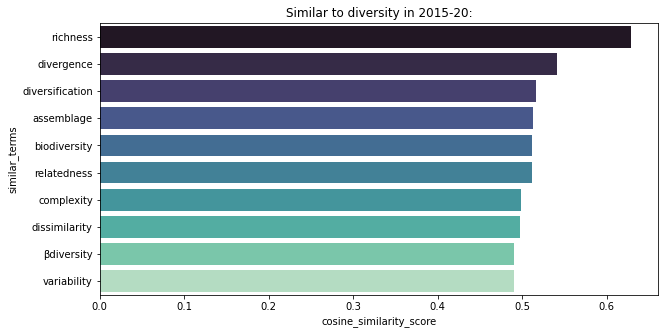

In [43]:
diversity_sim_later = later_model.wv.most_similar('diversity')
diversity_sim_later = pd.DataFrame(data=diversity_sim_later).rename(columns={0: "similar_terms", 
                                                                             1: "cosine_similarity_score"})
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="cosine_similarity_score", y="similar_terms", 
            data=diversity_sim_later, palette="mako", 
            ax=ax).set_title('Similar to diversity in 2015-20:')

#### Comparing Race and Diversity 

That makes it a little difficult to directly compare the terms, so let's use the `wv.similarity()` function to directly look at that. This basically allows you to directly compare the two words to see how close they are in the vector space.

In [44]:
race_diversity_early = earlier_model.wv.similarity('race','diversity')
race_diversity_later = later_model.wv.similarity('race','diversity')
racial_diversity_early = earlier_model.wv.similarity('racial','diversity')
racial_diversity_later = later_model.wv.similarity('racial','diversity')
ethnic_diversity_early = earlier_model.wv.similarity('ethnic','diversity')
ethnic_diversity_later = later_model.wv.similarity('ethnic','diversity')
ethnicity_diversity_early = earlier_model.wv.similarity('ethnicity','diversity')
ethnicity_diversity_later = later_model.wv.similarity('ethnicity','diversity')
race_diverse_early = earlier_model.wv.similarity('race','diverse')
race_diverse_later = later_model.wv.similarity('race','diverse')
racial_diverse_early = earlier_model.wv.similarity('racial','diverse')
racial_diverse_later = later_model.wv.similarity('racial','diverse')
ethnic_diverse_early = earlier_model.wv.similarity('ethnic','diverse')
ethnic_diverse_later = later_model.wv.similarity('ethnic','diverse')
ethnicity_diverse_early = earlier_model.wv.similarity('ethnicity','diverse')
ethnicity_diverse_later = later_model.wv.similarity('ethnicity','diverse')

print('Overall Comparisons of Racial and Diversity Terms:')
print('Race and diversity:      1990-2000 score:', race_diversity_early, '  2010-2020 score:', race_diversity_later, ' Difference is:', race_diversity_later-race_diversity_early )
print('Racial and diversity:    1990-2000 score:', racial_diversity_early, ' 2010-2020 score:', racial_diversity_later, '  Difference is:', racial_diversity_later-racial_diversity_early)
print('Ethnic and diversity:    1990-2000 score:', ethnic_diversity_early, ' 2010-2020 score:', ethnic_diversity_later, '  Difference is:', ethnic_diversity_later-ethnic_diversity_early)
print('Ethnicity and diversity: 1990-2000 score:', ethnicity_diversity_early, ' 2010-2020 score:', ethnicity_diversity_later, '  Difference is:', ethnicity_diversity_later-ethnicity_diversity_early)
print('Race and diverse:        1990-2000 score:', race_diverse_early, '2010-2020 score:', race_diverse_later, ' Difference is:', race_diverse_later-race_diverse_early)
print('Racial and diverse:      1990-2000 score:', racial_diverse_early, ' 2010-2020 score:', racial_diverse_later, '  Difference is:', racial_diverse_later-racial_diverse_early)
print('Ethnic and diverse:      1990-2000 score:', ethnic_diverse_early, ' 2010-2020 score:', ethnic_diverse_later, '  Difference is:', ethnic_diverse_later-ethnic_diverse_early)
print('Ethnicity and diverse:   1990-2000 score:', ethnicity_diverse_early, ' 2010-2020 score:', ethnicity_diverse_later, '  Difference is:', ethnicity_diverse_later-ethnicity_diverse_early)

Overall Comparisons of Racial and Diversity Terms:
Race and diversity:      1990-2000 score: 0.1098478   2010-2020 score: 0.056281008  Difference is: -0.05356679
Racial and diversity:    1990-2000 score: 0.23683704  2010-2020 score: 0.16152659   Difference is: -0.075310454
Ethnic and diversity:    1990-2000 score: 0.23629633  2010-2020 score: 0.19687602   Difference is: -0.039420307
Ethnicity and diversity: 1990-2000 score: 0.12261166  2010-2020 score: 0.11251864   Difference is: -0.010093018
Race and diverse:        1990-2000 score: 0.116734155 2010-2020 score: 0.041911207  Difference is: -0.07482295
Racial and diverse:      1990-2000 score: 0.17637432  2010-2020 score: 0.11191944   Difference is: -0.064454876
Ethnic and diverse:      1990-2000 score: 0.24290219  2010-2020 score: 0.18804574   Difference is: -0.05485645
Ethnicity and diverse:   1990-2000 score: 0.10018067  2010-2020 score: 0.07947744   Difference is: -0.020703234


To interpret these scores, we have to know that a value of 1 means that two words have a perfect relationship, 0 means the two words have no relationship, and -1 means that they are perfect opposites ([Stack Overflow 2017](https://stackoverflow.com/questions/42381902/interpreting-negative-word2vec-similarity-from-gensim), [Google Groups 2019](https://groups.google.com/g/gensim/c/SZ1yct-7CuU)). Thus, when we compare all of the race, racial, ethnic and ethnicity vectors to diverse and diversity, we actually see that they are becoming *less* similar over time. Thus, despite our earlier hypotheses indicating that diversity is rising while racial terms decline, it does not seem to be the case that the two are being used in similar ways over time. It is worth noting that a number of things could complicate this interpretation, including the polysemy of diversity. 

Next, we will create a plot for this. We have to keep this grey scale, because sociologists are still living in the late 1900s. 

Text(0, 0.5, 'Terms Comparions')

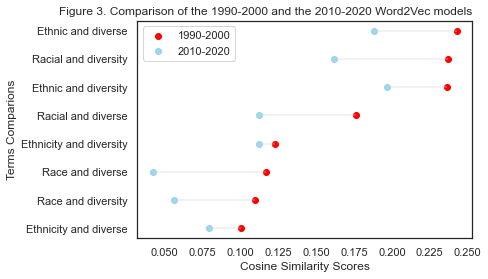

In [68]:
plt.figure(figsize=(6, 4))
sns.set_style("white")
d = {'group': ['Race and diversity', 'Racial and diversity','Ethnic and diversity','Ethnicity and diversity',
               'Race and diverse','Racial and diverse','Ethnic and diverse','Ethnicity and diverse'], 
     '1990-2000': [race_diversity_early, racial_diversity_early,ethnic_diversity_early,ethnicity_diversity_early,
                   race_diverse_early,racial_diverse_early,ethnic_diverse_early,ethnicity_diverse_early], 
     '2010-2020': [race_diversity_later, racial_diversity_later,ethnic_diversity_later,ethnicity_diversity_later,
                   race_diverse_later, racial_diverse_later, ethnic_diverse_later, ethnicity_diverse_later]}
df = pd.DataFrame(data=d)
df

ordered_df = df.sort_values(by='1990-2000')
my_range=range(1,len(df.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['1990-2000'], xmax=ordered_df['2010-2020'], color='lightgrey', alpha=0.4)
plt.scatter(ordered_df['1990-2000'], my_range, color='red', alpha=1, label='1990-2000')
plt.scatter(ordered_df['2010-2020'], my_range, color='skyblue', alpha=0.8 , label='2010-2020')
#plt.scatter(ordered_df['1990-2000'], my_range, color='black', alpha=1, label='1990-2000')
#plt.scatter(ordered_df['2010-2020'], my_range, color='dimgrey', alpha=0.8 , label='2010-2020')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Figure 3. Comparison of the 1990-2000 and the 2010-2020 Word2Vec models", loc='right')
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Terms Comparions')

Before moving on to plots of these vectors, let's take a look at specific racial terms and see how they compare to diversity. 

In [69]:
black_div_early = earlier_model.wv.similarity('black','diversity')
black_div_later = later_model.wv.similarity('black','diversity')
white_div_early = earlier_model.wv.similarity('white','diversity')
white_div_later = later_model.wv.similarity('white','diversity')
hisp_div_early = earlier_model.wv.similarity('hispanic','diversity')
hisp_div_later = later_model.wv.similarity('hispanic','diversity')
asian_div_early = earlier_model.wv.similarity('asian','diversity')
asian_div_later = later_model.wv.similarity('asian','diversity')
black_divs_early = earlier_model.wv.similarity('black','diverse')
black_divs_later = later_model.wv.similarity('black','diverse')
white_divs_early = earlier_model.wv.similarity('white','diverse')
white_divs_later = later_model.wv.similarity('white','diverse')
hisp_divs_early = earlier_model.wv.similarity('hispanic','diverse')
hisp_divs_later = later_model.wv.similarity('hispanic','diverse')
asian_divs_early = earlier_model.wv.similarity('asian','diverse')
asian_divs_later = later_model.wv.similarity('asian','diverse')

print('Additional Comparisons of Racial and Diversity Terms:')
print('Black and diversity:    1990-1995 score:', black_div_early, '    2015-2020 score:', black_div_later, ' Difference is:', black_div_later-black_div_early)
print('White and diversity:    1990-1995 score:', white_div_early, '  2015-2020 score:', white_div_later, ' Difference is:', white_div_later-white_div_early)
print('Hispanic and diversity: 1990-1995 score:', hisp_div_early, '   2015-2020 score:', hisp_div_later, '  Difference is:', hisp_div_later-hisp_div_early)
print('Asian and diversity:    1990-1995 score:', asian_div_early, '   2015-2020 score:', asian_div_later, '  Difference is:', asian_div_later-asian_div_early)
print('Black and diverse:      1990-1995 score:', black_divs_early, ' 2015-2020 score:', black_divs_later, ' Difference is:', black_divs_later-black_divs_early)
print('White and diverse:      1990-1995 score:', white_divs_early, '2015-2020 score:', white_divs_later, ' Difference is:', white_divs_later-white_divs_early)
print('Hispanic and diverse:   1990-1995 score:', hisp_divs_early, '   2015-2020 score:', hisp_divs_later, ' Difference is:', hisp_divs_later-hisp_divs_early)
print('Asian and diversity:    1990-1995 score:', asian_divs_early, '  2015-2020 score:', asian_divs_later, '  Difference is:', asian_divs_later-asian_divs_early)

Additional Comparisons of Racial and Diversity Terms:
Black and diversity:    1990-1995 score: 0.0904578     2015-2020 score: 0.087393895  Difference is: -0.0030639023
White and diversity:    1990-1995 score: 0.019223448   2015-2020 score: 0.016186127  Difference is: -0.0030373204
Hispanic and diversity: 1990-1995 score: 0.13115858    2015-2020 score: 0.09106717   Difference is: -0.040091403
Asian and diversity:    1990-1995 score: 0.20810144    2015-2020 score: 0.13883302   Difference is: -0.06926842
Black and diverse:      1990-1995 score: -0.008694982  2015-2020 score: 0.037391514  Difference is: 0.046086498
White and diverse:      1990-1995 score: -0.0060019027 2015-2020 score: 0.011702324  Difference is: 0.017704226
Hispanic and diverse:   1990-1995 score: 0.07913865    2015-2020 score: 0.087811805  Difference is: 0.008673154
Asian and diversity:    1990-1995 score: 0.116690196   2015-2020 score: 0.12013865   Difference is: 0.0034484565


Text(0, 0.5, 'Terms Comparions')

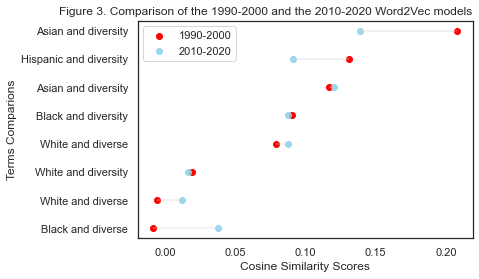

In [73]:
plt.figure(figsize=(6, 4))
sns.set_style("white")
d = {'group': ['Black and diversity', 'White and diversity','Hispanic and diversity','Asian and diversity',
               'Black and diverse','White and diverse','White and diverse','Asian and diversity'], 
     '1990-2000': [black_div_early, white_div_early, hisp_div_early, asian_div_early, black_divs_early, white_divs_early, hisp_divs_early, asian_divs_early], 
     '2010-2020': [black_div_later, white_div_later, hisp_div_later, asian_div_later,black_divs_later,white_divs_later,hisp_divs_later,asian_divs_later ]}
df = pd.DataFrame(data=d)
df

ordered_df = df.sort_values(by='1990-2000')
my_range=range(1,len(df.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['1990-2000'], xmax=ordered_df['2010-2020'], color='lightgrey', alpha=0.4)
plt.scatter(ordered_df['1990-2000'], my_range, color='red', alpha=1, label='1990-2000')
plt.scatter(ordered_df['2010-2020'], my_range, color='skyblue', alpha=0.8 , label='2010-2020')
#plt.scatter(ordered_df['1990-2000'], my_range, color='black', alpha=1, label='1990-2000')
#plt.scatter(ordered_df['2010-2020'], my_range, color='dimgrey', alpha=0.4 , label='2010-2020')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Figure 3. Comparison of the 1990-2000 and the 2010-2020 Word2Vec models", loc='right')
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Terms Comparions')

Overall, this approach gave us some mixed results. Asian and diversity/diverse become significantly more dissimilar while white and diversity/diverse become more similar. Once could argue that this supports Berrey's argument about diversity being used to reinforce whiteness, but it also might just be diverse/diversity being more to describe variation in neuroscience where a common term is 'white matter.' In the end, it might just be the case that the Word2Vec model's inability to deal with polysemy does not help us answer our research question. Before concluding that, let's look at visual plots of our vectors. 

#### Singular Value Decomposition 

In order to do that, we have to reduce the 512 dimension model into just 2 dimensions using the `TSNE` package. We will do this for both models, which will take around 30 minutes to run. Scroll down to see the results...

In [74]:
%%capture
earlier_vocab = list(earlier_model.wv.vocab)
earlier_x = earlier_model[earlier_vocab]
earlier_tsne = TSNE(n_components=2)
earlier_tsne_x = earlier_tsne.fit_transform(earlier_x)
df_earlier = pd.DataFrame(earlier_tsne_x, index=earlier_vocab, columns=['x', 'y'])

later_vocab = list(later_model.wv.vocab)
later_x = later_model[later_vocab]
later_tsne = TSNE(n_components=2)
later_tsne_x = later_tsne.fit_transform(later_x)
df_later = pd.DataFrame(later_tsne_x, index=later_vocab, columns=['x', 'y'])

keys = ['race', 'racial', 'ethnic', 'ethnicity', 'diverse', 'diversity']

earlier_embedding_clusters = []
earlier_word_clusters = []
for word in keys:
    earlier_embeddings = []
    earlier_words = []
    for similar_word, _ in earlier_model.wv.most_similar(word, topn=30):
        earlier_words.append(similar_word)
        earlier_embeddings.append(earlier_model[similar_word])
    earlier_embedding_clusters.append(earlier_embeddings)
    earlier_word_clusters.append(earlier_words)
    
earlier_embedding_clusters = np.array(earlier_embedding_clusters)
n, m, k = earlier_embedding_clusters.shape
e_tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
e_embeddings_en_2d = np.array(e_tsne_model_en_2d.fit_transform(earlier_embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

later_embedding_clusters = []
later_word_clusters = []
for word in keys:
    later_embeddings = []
    later_words = []
    for similar_word, _ in later_model.wv.most_similar(word, topn=30):
        later_words.append(similar_word)
        later_embeddings.append(later_model[similar_word])
    later_embedding_clusters.append(later_embeddings)
    later_word_clusters.append(later_words)
    
later_embedding_clusters = np.array(later_embedding_clusters)
n, m, k = later_embedding_clusters.shape
l_tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
l_embeddings_en_2d = np.array(l_tsne_model_en_2d.fit_transform(later_embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

#### Plotting the Results of the Word2Vec Models (1990-95 vs 2015-20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

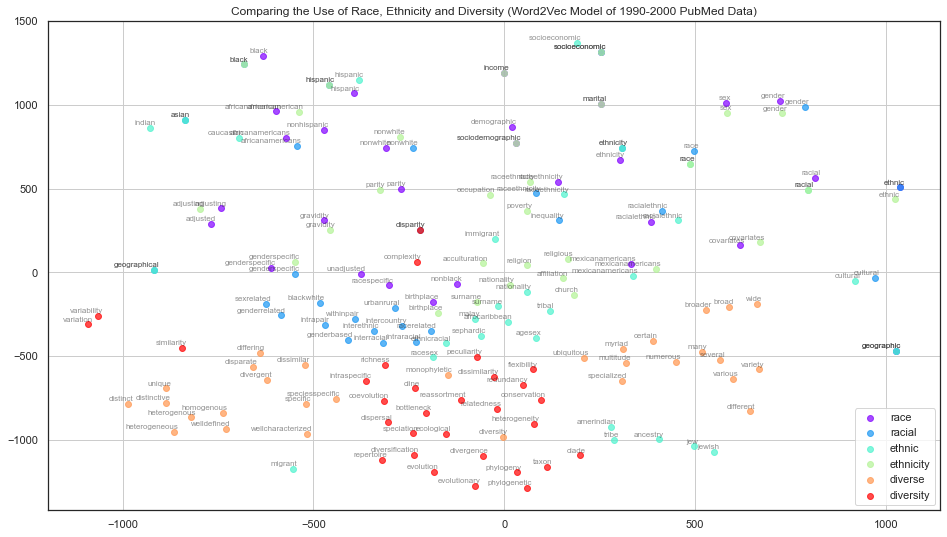

<Figure size 1008x648 with 0 Axes>

In [75]:
def tsne_plot_similar_words(title, labels, earlier_embedding_clusters, earlier_word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, earlier_embeddings, earlier_words, color in zip(labels, earlier_embedding_clusters, earlier_word_clusters, colors):
        x = earlier_embeddings[:, 0]
        y = earlier_embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(earlier_words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


early_plot = tsne_plot_similar_words('Comparing the Use of Race, Ethnicity and Diversity (Word2Vec Model of 1990-2000 PubMed Data)', 
                        keys, e_embeddings_en_2d, earlier_word_clusters, 
                        0.7, 'earlier_comparison.png')

os.chdir("/sfs/qumulo/qhome/kb7hp/git/diversity/data/word_embeddings/")
plt.savefig('earlier_comparison.png')
early_plot

Now we can look at how the words in each vector of race, racial, ethnic, ethnicity, diversity and diverse. When we start to look at the specific terms of interest, we find racial and ethnic are the far left or toward the bottom-center. Other variants of these terms are more centered in the plot. On the other hand, diversity and diverse are both clustered toward the top-right, which means that race and diversity are fairly far away in the vector space.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

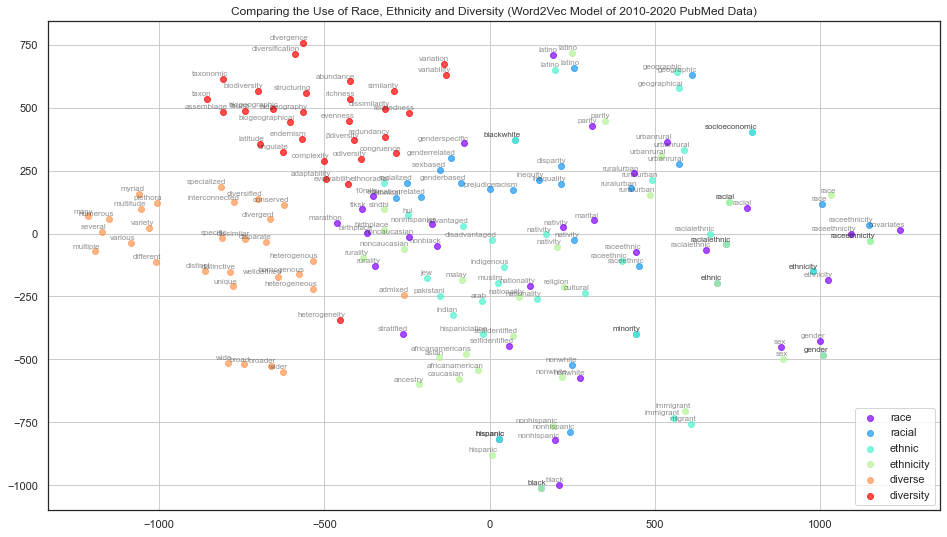

<Figure size 1008x648 with 0 Axes>

In [76]:
def tsne_plot_similar_words(title, labels, later_embedding_clusters, later_word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, later_embeddings, later_words, color in zip(labels, later_embedding_clusters, later_word_clusters, colors):
        x = later_embeddings[:, 0]
        y = later_embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(later_words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


later_plot = tsne_plot_similar_words('Comparing the Use of Race, Ethnicity and Diversity (Word2Vec Model of 2010-2020 PubMed Data)', 
                        keys, l_embeddings_en_2d, later_word_clusters, 
                        0.7, 'later_comparison.png')

os.chdir("/sfs/qumulo/qhome/kb7hp/git/diversity/data/word_embeddings/")
plt.savefig('later_comparison.png')
later_plot

When we look at the same vectors in the 2015-20 model, it seems like the vectors are more closely related overall. However, when we look closer we see that the 'race' and 'ethnicity' are up in the top-left corner while 'racial' and 'ethnic' are in the top-right corner. Both sets are still fairly separated from the red and orange diversity vectors. Although these plots do not show this as clear as one might want, our analyses above do suggest that diverse and diversity as well as race, racial, ethnic, and ethinicity are being used more dissimilarly over time. The challenging thing about this analysis disentangling the polysemy from how diversity is used. If we were able to 'disentange' the use of diveristy in its more general sense compared to its usage in the context of equity, inclusion and justice discussions, would we find that the two words are becoming more similar over time? 

#### Does diversity replace race/ethnicity?: Contextualizing Word Vectors with Heat Maps

After consulting some colleagues, we thought about two potential ways to test this. The first would be to turn to BERT or ELMo ([Fonteyn 2019](https://laurenthelinguist.files.wordpress.com/2019/08/sle_2019_bert.pdf); [Rakhmanberdieva 2019](https://towardsdatascience.com/word-representation-in-natural-language-processing-part-iii-2e69346007f)), which would allow us to identify the contexual variations in how diversity is used. The problem is that BERT, for example, is trained on Wikipedia data that is not historical. There are BERT options like PubMedBERT and BioBERT, but they are trained on the entirety of the PubMed abstracts, which fails to help us identify historical variations in how the terms change. Moreover, it would not make much sense to fine tune a BERT model on the same data in which it was already trained on. Thus, we ruled out BERT as an option. 

Instead, we decided to continue using Word2Vec and instead compare the diveristy vector to a myriad of other vectors that we measured in H1. Our logic was that if we see diversity become more semantically similar to other diversity-related vectors over time time, while also moving further away from the racial/ethic vectors, we could infer that diversity is actually replacing race/ethnicity in biomedical abstracts over time. 

To do this, I developed a function named `w2v_similarities_over_time()` that calculates the difference between all the words witin a dictionary of terms and then compares how they have changed relative to one another over time. Specifically, I will be comparing how diverse and diversity change relative to the terms in our race/ethnicity, sex/gender, sexuality, social class, and cultural/equity categories from [Hypotheses 1 and 2](https://growthofdiversity.netlify.app/methods/). Then, I will visualize the results of these models comparisons using some heat maps.

First step is importing our H1 library so we can pluck out all of the vectors for a heat map in a relatively automated manner.

In [77]:
# load dictionary of words 
os.chdir("/sfs/qumulo/qhome/kb7hp/git/diversity/data/dictionaries/")
h1_dictionary = pd.read_csv("diversity_project - tree_data.csv")
h1_dictionary = h1_dictionary[h1_dictionary['embeddings'] == 1].drop(['hypothesis', 'embeddings'], axis=1)
h1_dictionary = h1_dictionary.replace({'category': {'asian|black|hispanic_latinx|white': 'race_ethnicity'}}, regex=True)
h1_dictionary = h1_dictionary.replace({'category': {'sex_gender|sexuality': 'gender_sexuality'}}, regex=True)
h1_dictionary = h1_dictionary.replace({'category': {'cultural|equity': 'cultural_equity'}}, regex=True)
h1_dictionary = h1_dictionary.replace({'category': {'minority': 'social_class'}}, regex=True).sort_values(by=['category', 'term'])
h1_dictionary = h1_dictionary.replace({'term': {'under_served': 'underserved'}}, regex=True).sort_values(by=['category', 'term'])
h1_dictionary.head()

,category,term
0,cultural_equity,cultural
61,cultural_equity,disparity
65,cultural_equity,equality
63,cultural_equity,equity
68,cultural_equity,inequality


Next, we will define our `w2v_similarities_over_time()` function.

In [49]:
def w2v_similarities_over_time(df, w2v_m1, w2v_m2):
    ''' 
    function compares several word2vec vectors from two different years 
    and then examines how those several comparisons change over time  
    ----------------------------------------------------------------
    1) first it takes a dictionary of words and creates its product
    2) compares all of those words within the vector space of w2v_m1
    3) compares all of those words within the vector space of w2v_m2
    4) examines changes in the comparisons of w2v_m1 and w2v_m2 over time 
    
    '''
    df = list(product(df['term'], df['term']))
    df = pd.DataFrame(df, columns=['term1','term2'])
    
    cos_sim_m1 = []
    for index, row in df.iterrows():
        cos_sim_m1.append(w2v_m1.wv.similarity(row[0],row[1]))
    cos_sim_m1 = DataFrame(cos_sim_m1, columns=['cos_sim_m1'])
    df = df.merge(cos_sim_m1, left_index=True, right_index=True) 
    
    cos_sim_m2 = []
    for index, row in df.iterrows():
        cos_sim_m2.append(w2v_m2.wv.similarity(row[0],row[1]))
    cos_sim_m2 = DataFrame(cos_sim_m2, columns=['cos_sim_m2'])
    df = df.merge(cos_sim_m2, left_index=True, right_index=True)
    df["cos_sim_diffs"] = df["cos_sim_m1"] - df["cos_sim_m2"]
    
    df_matrix = df.pivot("term1", "term2", "cos_sim_diffs")
    return df_matrix

Then we will create each of our four heat maps and combine them into a joint figure for publication (again in grey scale for the sociologists)...

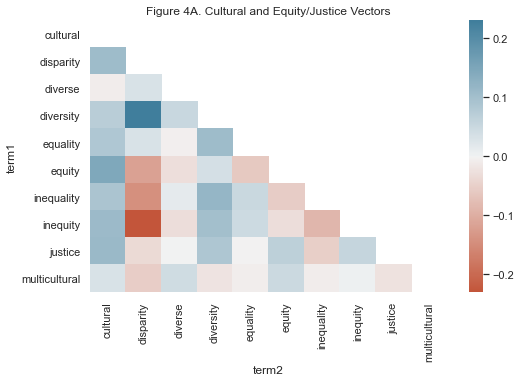

In [78]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
cultural_equity = h1_dictionary[(h1_dictionary['category'] == 'cultural_equity') | 
                                (h1_dictionary['category'] == 'diversity')]
cultural_equity_matrix = w2v_similarities_over_time(cultural_equity, earlier_model, later_model)
cmap = sns.diverging_palette(20, 230, as_cmap=True)
#cmap = sns.cubehelix_palette(200, hue=0.05, rot=0, light=0, dark=0.9)
corr_cultural = cultural_equity_matrix.corr()
mask_cultural = np.triu(np.ones_like(corr_cultural, dtype=bool))
cultural_equity_heatmap = sns.heatmap(cultural_equity_matrix, mask=mask_cultural, cmap=cmap).set_title("Figure 4A. Cultural and Equity/Justice Vectors")

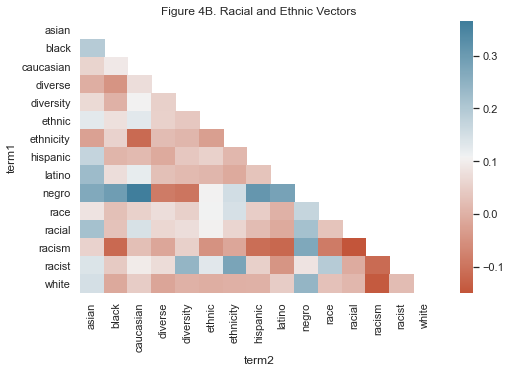

In [79]:
race_ethnicity = h1_dictionary[(h1_dictionary['category'] == 'race_ethnicity') | 
                               (h1_dictionary['category'] == 'diversity')]
race_ethnicity_matrix = w2v_similarities_over_time(race_ethnicity, earlier_model, later_model)
corr_race = race_ethnicity_matrix.corr()
mask_race = np.triu(np.ones_like(corr_race, dtype=bool))
race_ethnicity_heatmap = sns.heatmap(race_ethnicity_matrix, mask=mask_race, cmap=cmap).set_title("Figure 4B. Racial and Ethnic Vectors")

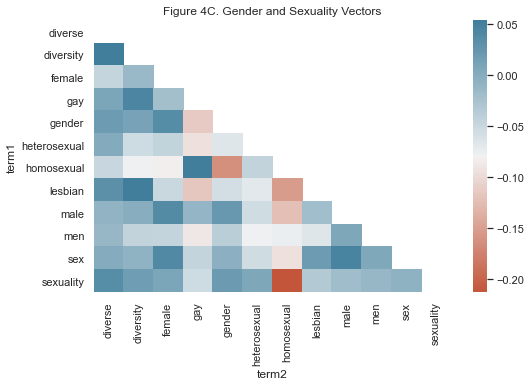

In [80]:
gender_sexuality = h1_dictionary[(h1_dictionary['category'] == 'gender_sexuality') | 
                                 (h1_dictionary['category'] == 'diversity')]
gender_sexuality = gender_sexuality[gender_sexuality.term != 'women']
gender_sexuality_matrix = w2v_similarities_over_time(gender_sexuality, earlier_model, later_model)
corr_gender = gender_sexuality_matrix.corr()
mask_gender = np.triu(np.ones_like(corr_gender, dtype=bool))
gender_sexuality_heatmap = sns.heatmap(gender_sexuality_matrix, mask=mask_gender, cmap=cmap).set_title("Figure 4C. Gender and Sexuality Vectors")

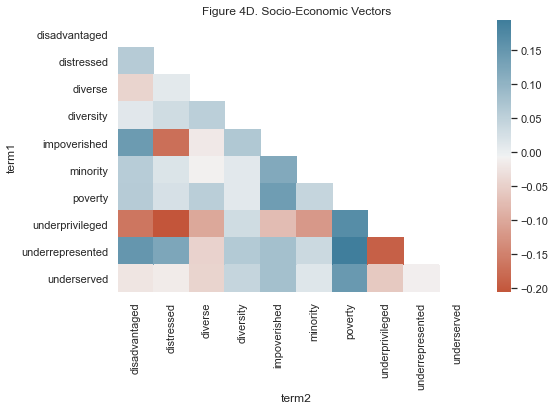

In [81]:
social_class = h1_dictionary[(h1_dictionary['category'] == 'social_class') | 
                             (h1_dictionary['category'] == 'diversity')]
social_class_matrix = w2v_similarities_over_time(social_class, earlier_model, later_model)
corr_class = social_class_matrix.corr()
mask_class = np.triu(np.ones_like(corr_class, dtype=bool))
social_class_heatmap = sns.heatmap(social_class_matrix, mask=mask_class, cmap=cmap).set_title("Figure 4D. Socio-Economic Vectors")

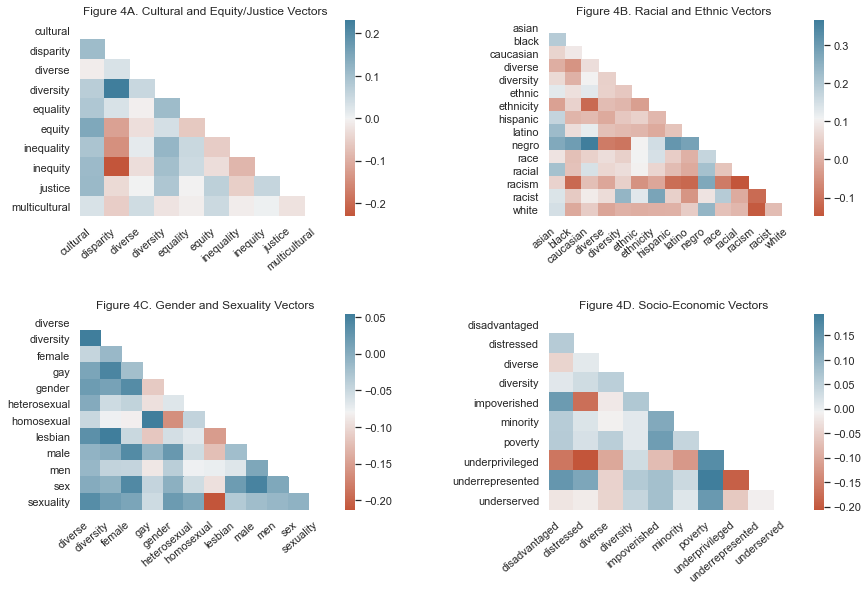

In [82]:
sns.set(rc={'figure.figsize':(14,9)})
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=False)
cultural_equity_g = sns.heatmap(cultural_equity_matrix, mask=mask_cultural, cmap=cmap, ax=ax1)
cultural_equity_g.set_title("Figure 4A. Cultural and Equity/Justice Vectors")
cultural_equity_g.set(xlabel=None)
cultural_equity_g.set(ylabel=None)
cultural_equity_g.set_xticklabels(cultural_equity_g.get_xticklabels(), rotation=40, horizontalalignment='right')
race_ethnicity_g = sns.heatmap(race_ethnicity_matrix, mask=mask_race, cmap=cmap, ax=ax2)
race_ethnicity_g.set_title("Figure 4B. Racial and Ethnic Vectors")
race_ethnicity_g.set(xlabel=None)
race_ethnicity_g.set(ylabel=None)
race_ethnicity_g.set_xticklabels(race_ethnicity_g.get_xticklabels(), rotation=40, horizontalalignment='right')
gender_sexuality_g = sns.heatmap(gender_sexuality_matrix, mask=mask_gender, cmap=cmap, ax=ax3)
gender_sexuality_g.set_title("Figure 4C. Gender and Sexuality Vectors")
gender_sexuality_g.set(xlabel=None)
gender_sexuality_g.set(ylabel=None)
gender_sexuality_g.set_xticklabels(gender_sexuality_g.get_xticklabels(), rotation=40, horizontalalignment='right')
social_class_g = sns.heatmap(social_class_matrix, mask=mask_class, cmap=cmap, ax=ax4)
social_class_g.set_title("Figure 4D. Socio-Economic Vectors")
social_class_g.set(xlabel=None)
social_class_g.set(ylabel=None)
social_class_g.set_xticklabels(social_class_g.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

The final product provides some interesting results. It sure looks like diversity is generally more similar to most of the vectors apart from the race/ethnicity vectors, which could suggest that diversity is replacing race/ethnicity within in the context of articles that are examining other historically underrepresented populations in biomedical research. 

#### References

[Connor Gilroy's Tutorial](https://ccgilroy.github.io/community-discourse/word-similarity.html)

[Dominiek Ter Heide's Word2Vec Explorer](https://github.com/dominiek/word2vec-explorer)

[Sergey Smetanin's Medium Tutorial](https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d)

[Guru 99's Tutorial on Word Embeddings](https://www.guru99.com/word-embedding-word2vec.html)

[Rakhmanberdieva's 2019 Medium Post](https://towardsdatascience.com/word-representation-in-natural-language-processing-part-iii-2e69346007f)

[Fonteyn's 2019 Presentation](https://laurenthelinguist.files.wordpress.com/2019/08/sle_2019_bert.pdf)

[Bagheri's Medium Post on SVD](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d)